In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***About the Dataset + Pre-Processing***

In [ ]:
data = pd.read_csv('/content/drive/My Drive/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1")
data.columns = ['sentiment','id','date','query','special','text']
data.head()

,sentiment,id,date,query,special,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.drop(['id','date','query','special','sentiment'],axis = 1,inplace = True)
df = data.sample(100000)

In [ ]:
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def percentage(part,whole):
 return 100 * float(part)/float(whole)
noOfTweet = 5000
tweets = df["text"].head(5000)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
count = 0
for tweet in tweets:
 tweet_list.append(tweet)
 analysis = TextBlob(tweet)
 count+=1
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 #print(comp)
 if comp<0:
   negative_list.append(tweet)
   negative += 1
 elif comp>0:
   positive_list.append(tweet)
   positive += 1
 else:
   neutral_list.append(tweet)
   neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5000
positive number:  2272
negative number:  1349
neutral number:  1379


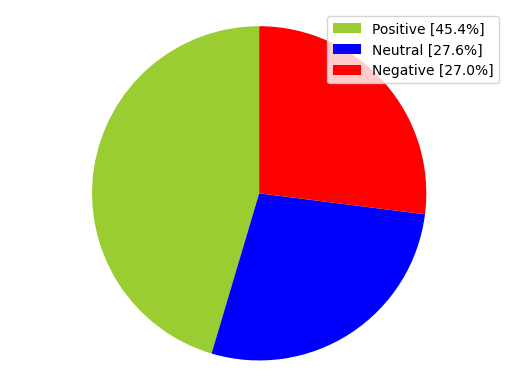

In [ ]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.axis("equal")
plt.show()

In [ ]:
print(tweet_list)

                                                      0
0     I'm always the last one in the office....espec...
1     @babblingbrookie It's your birthday?! ow..Happ...
2                back from the casino a big fat loser! 
3     DAMMIT, right side of the earphones not workin...
4     They dont have my believe bracelet anymore! I ...
...                                                 ...
4995  @msfitznham I like the new setup on your blog!...
4996  @jbrinkman Man... I am surprised that I didn't...
4997  @britt_mccormick wow way to be mean   haha but...
4998        @mattfazzi  I hope you get well soon! &lt;3
4999  Anyone been subscribed to sub-sub-Vice yoof we...

[5000 rows x 1 columns]


In [ ]:
df[["polarity", "subjectivity"]] = df["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df["text"].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 if neg > pos:
  df.loc[index, "sentiment"] = "negative"
 elif pos > neg:
  df.loc[index, "sentiment"] = "positive"
 else:
  df.loc[index, "sentiment"] = "neutral"
  df.loc[index, "neg"] = neg
  df.loc[index, "neu"] = neu
  df.loc[index, "pos"] = pos
  df.loc[index, "compound"] = comp
df.head(10)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
174094,I'm always the last one in the office....espec...,0.000000,0.066667,neutral,0.0,1.0,0.0,0.0
1298185,@babblingbrookie It's your birthday?! ow..Happ...,1.000000,0.300000,positive,NaN,NaN,NaN,NaN
1735,back from the casino a big fat loser!,0.000000,0.050000,negative,NaN,NaN,NaN,NaN
386369,"DAMMIT, right side of the earphones not workin...",0.285714,0.535714,neutral,0.0,1.0,0.0,0.0
669307,They dont have my believe bracelet anymore! I ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
205997,@Welshracer Bernie Ecclestone in any sort of c...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
51753,"I wanted to go and see the bunnies today, no s...",0.000000,0.500000,positive,NaN,NaN,NaN,NaN
1570789,looks like im pulling another all nighter caus...,0.302778,0.494444,positive,NaN,NaN,NaN,NaN
1528855,What a great weekend! Can't wait til the next....,1.000000,0.750000,positive,NaN,NaN,NaN,NaN
717209,Boring.. I hate it here! Nothing to do.. Huhu..,-1.000000,0.950000,negative,NaN,NaN,NaN,NaN


In [ ]:
import string,re
def pre_process(i):
    i = re.compile(r'<[^>]+>').sub('',i)
    i = re.sub(r"\s+[a-zA-Z]\s+", ' ', i)
    i = re.sub(r"([0-9]+)", ' ', i)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    i = i.translate(table)
    i = re.sub(r'\s+', ' ', i)
    return i

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
df['Cleaned'] = df['text'].apply(lambda text:pre_process(text.lower()))

df['Cleaned'] = df['Cleaned'].apply(lambda text : remove_stopwords(text.lower()))

df['Cleaned'] = df['Cleaned'].apply(lambda x : x.split())

In [ ]:
df.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Cleaned
174094,I'm always the last one in the office....espec...,0.000000,0.066667,neutral,0.0,1.0,0.0,0.0,"[im, always, last, one, officeespecially, friday]"
1298185,@babblingbrookie It's your birthday?! ow..Happ...,1.000000,0.300000,positive,NaN,NaN,NaN,NaN,"[babblingbrookie, birthday, owhappy, birthday,..."
1735,back from the casino a big fat loser!,0.000000,0.050000,negative,NaN,NaN,NaN,NaN,"[back, casino, big, fat, loser]"
386369,"DAMMIT, right side of the earphones not workin...",0.285714,0.535714,neutral,0.0,1.0,0.0,0.0,"[dammit, right, side, earphones, working, anym..."
669307,They dont have my believe bracelet anymore! I ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN,"[dont, believe, bracelet, anymore, wanna, cry]"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


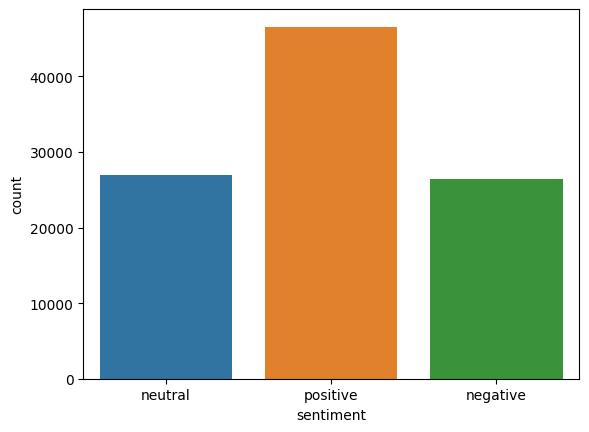

In [ ]:
sns.countplot(df.sentiment)

***Lemmatization & Vectorization***

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
wordnet=WordNetLemmatizer()
df['Cleaned'] = df['Cleaned'].apply(lambda x : [wordnet.lemmatize(i,pos="v") for i in x])
df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x]))
df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x.split()]))
df.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Cleaned
174094,I'm always the last one in the office....espec...,0.000000,0.066667,neutral,0.0,1.0,0.0,0.0,im always last one officeespecially friday
1298185,@babblingbrookie It's your birthday?! ow..Happ...,1.000000,0.300000,positive,NaN,NaN,NaN,NaN,babblingbrookie birthday owhappy birthday wish...
1735,back from the casino a big fat loser!,0.000000,0.050000,negative,NaN,NaN,NaN,NaN,back casino big fat loser
386369,"DAMMIT, right side of the earphones not workin...",0.285714,0.535714,neutral,0.0,1.0,0.0,0.0,dammit right side earphones work anymore
669307,They dont have my believe bracelet anymore! I ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN,dont believe bracelet anymore wanna cry


In [ ]:
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(df['Cleaned']).toarray()
x.shape

(100000, 2500)

***Creating Supervised Learning Models + Training***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,df['sentiment'],test_size = 0.2,random_state = 42)

In [ ]:
results_ACC = []

Accuracy is:  0.78955


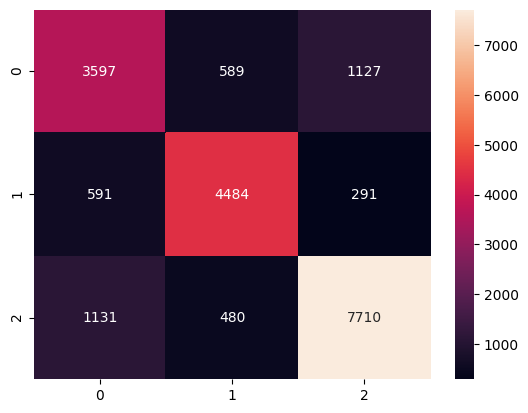

In [ ]:
clf_dt = DecisionTreeClassifier()     
clf_dt = clf_dt.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_dt.predict(x_test))
results_ACC.append(ac)

print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dt.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is:  0.85955


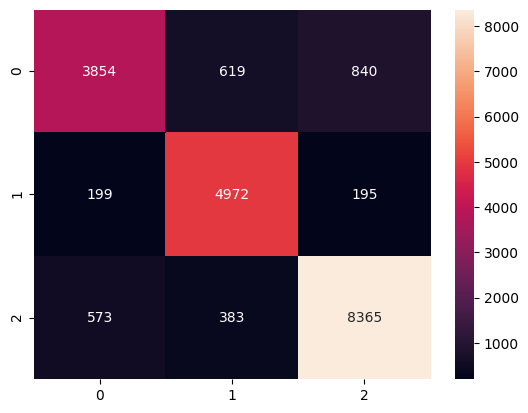

In [ ]:
#Logistic Regression 
clf_lr = LogisticRegression()   
clf_lr = clf_lr.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_lr.predict(x_test))
results_ACC.append(ac)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_lr.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.60505


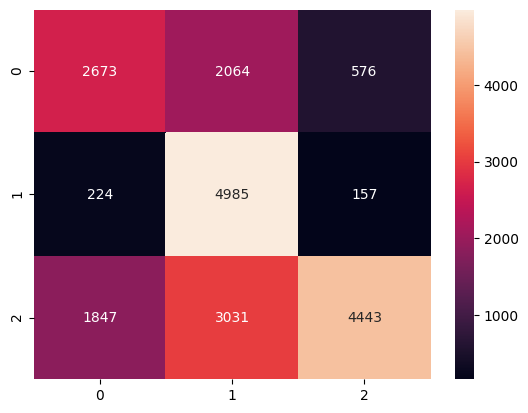

In [ ]:
#Naive Bayes classifier 
clf_nb = GaussianNB()    
clf_nb = clf_nb.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_nb.predict(x_test))
print('Accuracy is: ',ac)
results_ACC.append(ac)
cm = confusion_matrix(y_test,clf_nb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.84


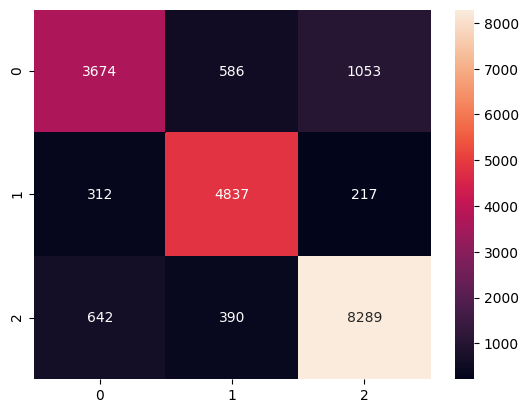

In [ ]:
#random forest classifier 
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
results_ACC.append(ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

*** Performance Comparison***

[78.95500000000001, 85.95500000000001, 60.505, 84.0]


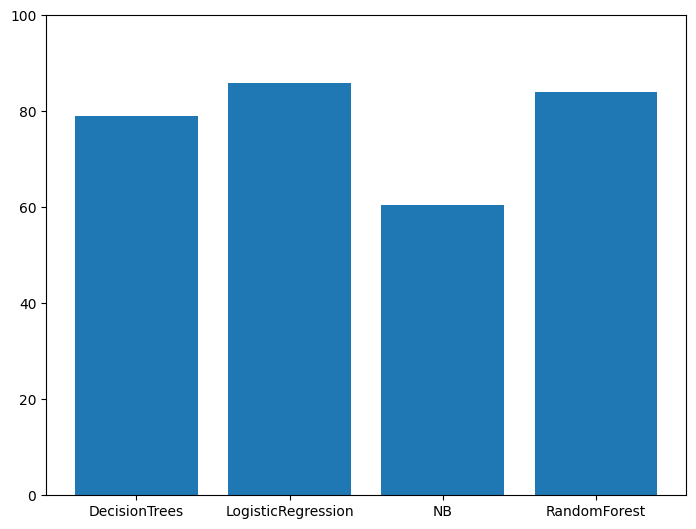

In [ ]:
model_list = ['DecisionTrees','LogisticRegression','NB','RandomForest']
fig = plt.figure()
results_ACC = list(map(lambda x: x/100,results_ACC))
print(results_ACC)
ax = fig.add_axes([0,0,1,1])
ax.bar(model_list,results_ACC)
ax.set_ylim([0,100])
plt.show()